# Preliminary Data Analysis for Various Metrics
### Unlinked Passenger Trips since 2002

In [1]:
import pandas as pd

In [17]:
# Read Unlinked Passenger Trips sheet
upt_df = pd.read_excel('data/January 2023 Adjusted Database_1_0.xlsx', sheet_name='Calendar Year UPT')

# View only King County
upt_df = upt_df[upt_df['Agency'] == 'King County Department of Metro Transit']

# Codes: DO = Directly Operated, PT = Purchased Transportation, MB = Metro Bus, TB = Trolleybus, TX = Taxi
# View only Mode == Metro Bus and TOS == Directly Operated
upt_df_mb = upt_df[(upt_df['Mode'] == 'MB') & (upt_df['TOS'] == 'DO')]

# Take transpose, only get year indices, change column name
upt_df_mb = upt_df_mb.T[9:]
upt_df_mb.columns = ['UPT']
upt_df_mb.head()

,UPT
2002,70032459.0
2003,70211189.0
2004,73290439.0
2005,73131328.0
2006,80247942.0


### Vehicle Revenue Miles since 2002

In [18]:
# Read Vehicle Revenue Miles sheet
vrm_df = pd.read_excel('data/January 2023 Adjusted Database_1_0.xlsx', sheet_name='Calendar Year VRM')

# View only King County
vrm_df = vrm_df[vrm_df['Agency'] == 'King County Department of Metro Transit']

# View only Mode == Metro Bus and TOS == Directly Operated
vrm_df_mb = vrm_df[(vrm_df['Mode'] == 'MB') & (vrm_df['TOS'] == 'DO')]

# Take transpose, only get year indices, change column name
vrm_df_mb = vrm_df_mb.T[9:]
vrm_df_mb.columns = ['VRM']
vrm_df_mb.head()

,VRM
2002,32727985.0
2003,34687688.0
2004,35777097.0
2005,37684874.0
2006,30842440.0


### Passenger Miles Traveled since 2002

In [50]:
# Read 'PMT' sheet from 'TS2.1 Service Data and Operating Expenses Time Series by Mode.xlsx'
pmt_df = pd.read_excel('data/TS2.1 Service Data and Operating Expenses Time Series by Mode.xlsx', sheet_name='PMT')

# View only King County
pmt_df = pmt_df[pmt_df['Agency Name'] == 'King County Department of Metro Transit(KCM)']

# View only Mode == Metro Bus and TOS == Directly Operated
pmt_df_mb = pmt_df[(pmt_df['Mode'] == 'MB') & (pmt_df['Service'] == 'DO')]

# Take transpose, only get year indices, change column name
pmt_df_mb = pmt_df_mb.T[29:]
pmt_df_mb.columns = ['PMT']
pmt_df_mb.head()

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,PMT
2002,428968369.0
2003,433019222.0
2004,457908164.0
2005,415515600.0
2006,438465911.0


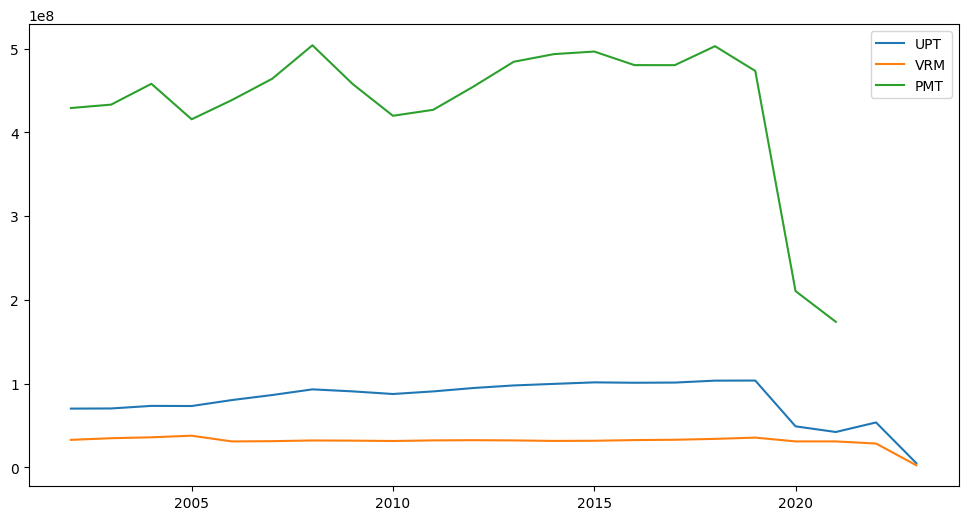

In [63]:
# Plot UPT, VRM, PMT, make figsize 10x5
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(upt_df_mb.index, upt_df_mb['UPT'], label='UPT')
plt.plot(vrm_df_mb.index, vrm_df_mb['VRM'], label='VRM')
plt.plot(pmt_df_mb.index.astype(int), pmt_df_mb['PMT'], label='PMT')
plt.legend()
plt.show()

### Vehicle Revenue Hours since 2002 (monthly)

In [21]:
# Read Vehicle Revenue Hours sheet
vrh_df = pd.read_excel('data/January 2023 Adjusted Database_1_0.xlsx', sheet_name='VRH')

# View only King County
vrh_df = vrh_df[vrh_df['Agency'] == 'King County Department of Metro Transit']

# View only Mode == Metro Bus and TOS == Directly Operated
vrh_df_mb = vrh_df[(vrh_df['Mode'] == 'MB') & (vrh_df['TOS'] == 'DO')]

# Take transpose, only get data indices, change column name
vrh_df_mb = vrh_df_mb.T[9:]
vrh_df_mb.columns = ['VRH']
vrh_df_mb.head()

,VRH
2002-01-01 00:00:00,216788.0
2002-02-01 00:00:00,192360.0
2002-03-01 00:00:00,213519.0
2002-04-01 00:00:00,213860.0
2002-05-01 00:00:00,217418.0


### Vehicle Operated in Maximum Service since 2002 (monthly)

In [23]:
# Read Vehicle Operated in Maximum Service (VOMS) sheet
voms_df = pd.read_excel('data/January 2023 Adjusted Database_1_0.xlsx', sheet_name='VOMS')

# View only King County
voms_df = voms_df[voms_df['Agency'] == 'King County Department of Metro Transit']

# View only Mode == Metro Bus and TOS == Directly Operated
voms_df_mb = voms_df[(voms_df['Mode'] == 'MB') & (voms_df['TOS'] == 'DO')]

# Take transpose, only get data indices, change column name
voms_df_mb = voms_df_mb.T[9:]
voms_df_mb.columns = ['VOMS']
voms_df_mb.head()

,VOMS
2002-01-01 00:00:00,931.0
2002-02-01 00:00:00,931.0
2002-03-01 00:00:00,931.0
2002-04-01 00:00:00,931.0
2002-05-01 00:00:00,931.0


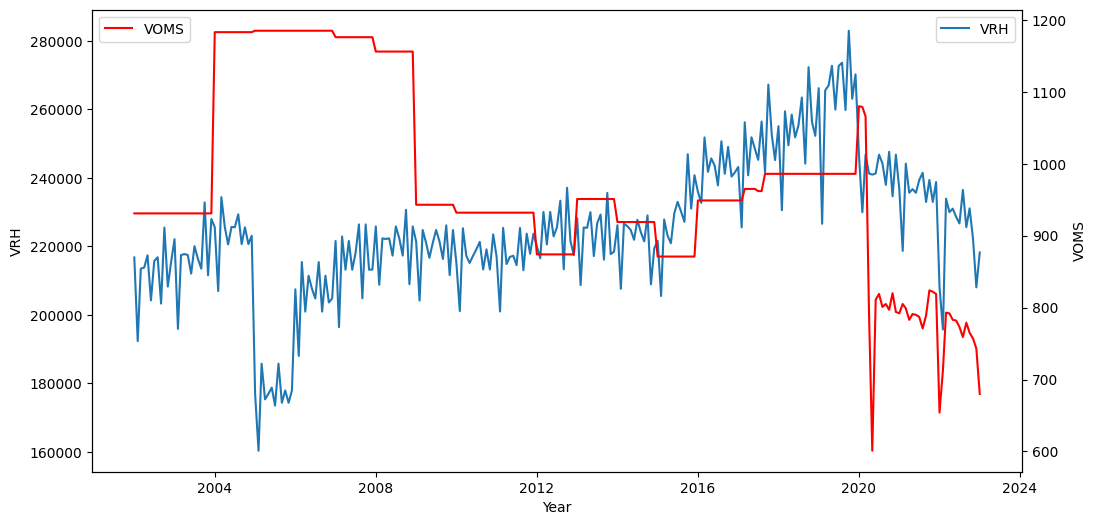

In [65]:
# Plot VRH on left axis, VOMS on right axis
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(vrh_df_mb.index, vrh_df_mb['VRH'], label='VRH')
ax1.set_xlabel('Year')
ax1.set_ylabel('VRH')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(voms_df_mb.index, voms_df_mb['VOMS'], label='VOMS', color='red')
ax2.set_ylabel('VOMS')
ax2.legend(loc='upper left')
plt.show()

### Capital Expenditures for Metro Buses

In [36]:
# Read 'Total' sheet from 'TS3.1 Capital Expenditures Time Series_0' workbook
capex_df = pd.read_excel('data/TS3.1 Capital Expenditures Time Series_0.xlsx', sheet_name='Total')

# View only King County
capex_df = capex_df[capex_df['Agency Name'] == 'King County Department of Metro Transit(KCM)']

# View only Mode == Metro Bus
capex_df_mb = capex_df[capex_df['Mode'] == 'MB']

# Take transpose, only get data indices, change column name
capex_df_mb = capex_df_mb.T[16:]
capex_df_mb.columns = ['CAPEX']
capex_df_mb.head()


c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,CAPEX
1992,38392650.0
1993,30604370.0
1994,28987249.0
1995,40301551.0
1996,63997729.0


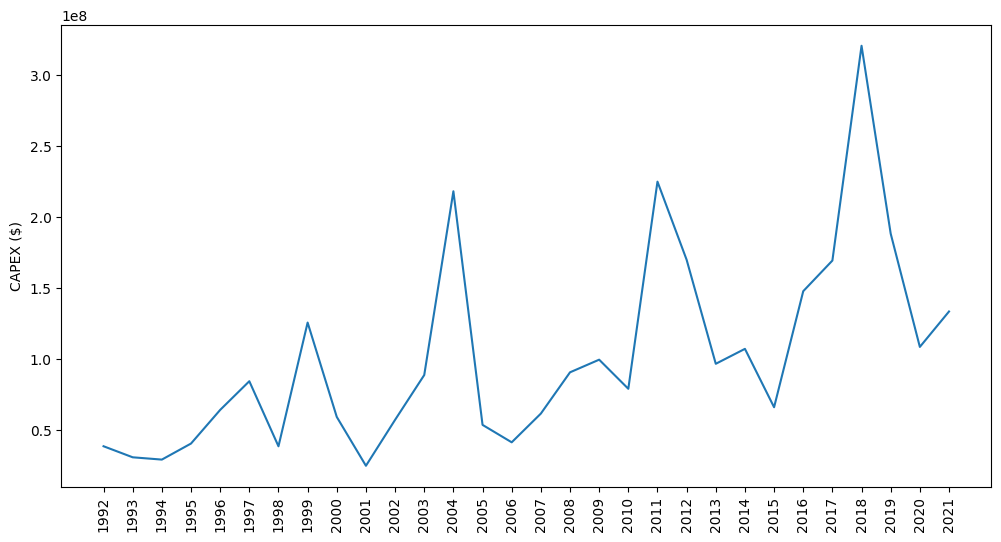

In [66]:
# Plot CAPEX
plt.figure(figsize=(12,6))
plt.plot(capex_df_mb.index, capex_df_mb['CAPEX'])
plt.xticks(rotation=90)
# Y-axis label, dollar sign
plt.ylabel('CAPEX ($)') 
plt.show()

### Funding
* Can be broken down into federal, state, or local funding
* I present the annual total funding bleow

In [43]:
# Read 'Total' sheet from 'TS1.1 Total Funding Time Series_2' workbook
funding_df = pd.read_excel('data/TS1.1 Total Funding Time Series_2.xlsx', sheet_name='Total')

# View only King County
funding_df = funding_df[funding_df['Agency Name'] == 'King County Department of Metro Transit(KCM)']

# Take transpose, only get data indices, change column name
funding_df = funding_df.T[15:]
funding_df.columns = ['Total Funding']
funding_df.head()

,Total Funding
1991,383107583.0
1992,329694739.0
1993,275639731.0
1994,277424929.0
1995,289759749.0


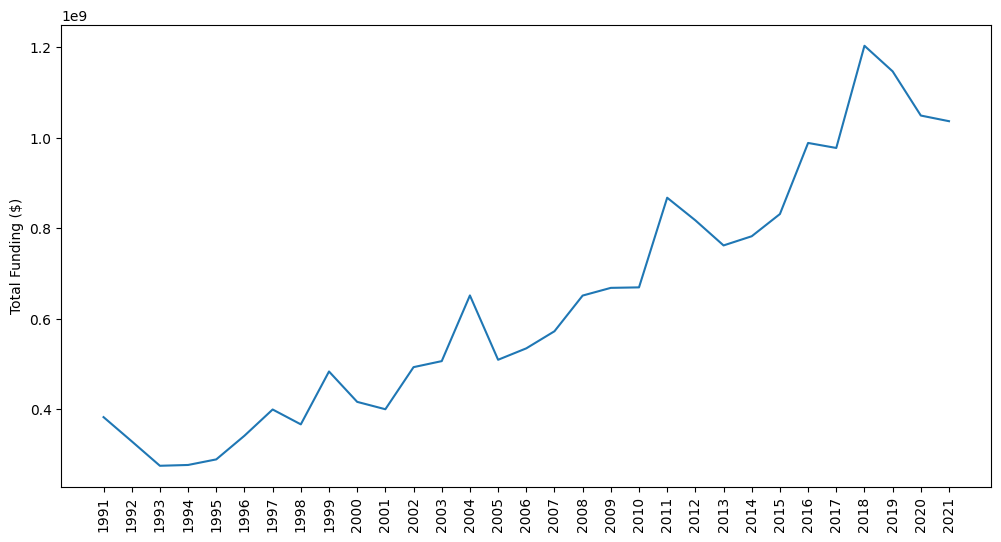

In [67]:
# Plot Total Funding
plt.figure(figsize=(12,6))
plt.plot(funding_df.index, funding_df['Total Funding'])
plt.xticks(rotation=90)
# Y-axis label, dollar sign
plt.ylabel('Total Funding ($)')
plt.show()